In [68]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                names= ['target', 'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16'])
df.head()

df.replace(to_replace=('n','y','?'),value=(0,1,np.NaN),inplace=True)
df = df.fillna(df.mean())

def targetConvert(row):
    if str(row['target']) == 'democrat':
        val = 1
    else:
        val = 0
    return val

df['pred'] = df.apply(targetConvert, axis=1)
df.drop('target',axis=1,inplace=True)


X = df.drop('pred',axis=1)
y = df.pred

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [100]:
##Question 1

scores = []
probs = []
algs = [KNeighborsClassifier(n_neighbors=10), GaussianNB(), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier()]

for alg in algs:
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)
    y_pred = list(y_pred)
    proba = alg.predict_proba(X_test)
    probs.append(proba[:,1])
    scores.append([str(alg).split('(')[0], metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred),
                 metrics.recall_score(y_test, y_pred), metrics.f1_score(y_test,y_pred)])
    

In [101]:
scoresdf = pd.DataFrame(scores)
scoresdf

,0,1,2,3,4
0,KNeighborsClassifier,0.916031,0.934211,0.922078,0.928105
1,GaussianNB,0.938931,0.915663,0.987013,0.950000
2,SVC,0.954198,0.949367,0.974026,0.961538
3,DecisionTreeClassifier,0.946565,0.937500,0.974026,0.955414
4,RandomForestClassifier,0.961832,0.950000,0.987013,0.968153


In [102]:
probs[3]

array([ 1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.])

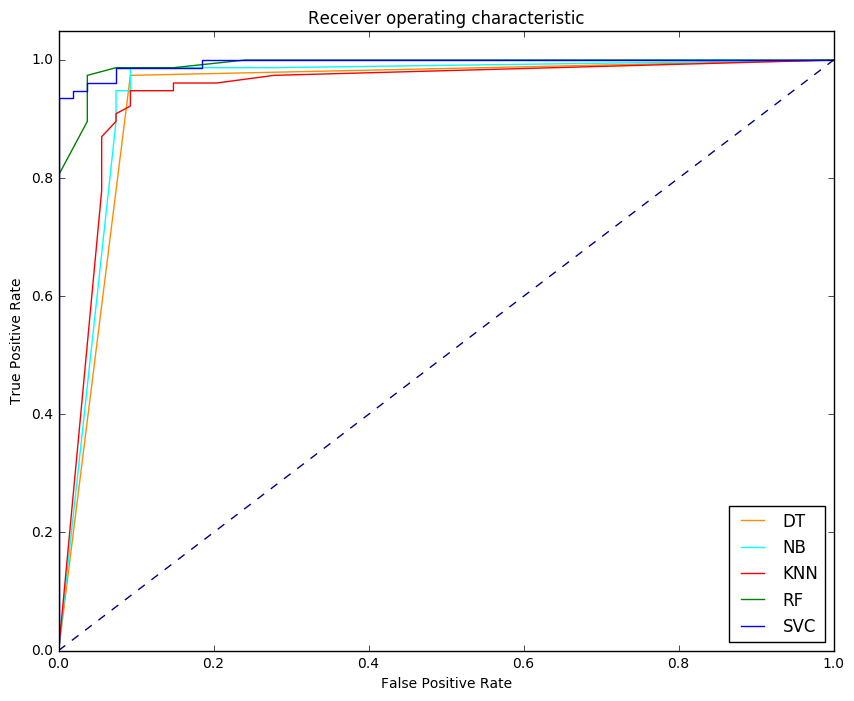

In [105]:
##Question 2

import matplotlib.pyplot as plt
%matplotlib inline

fprdt, tprdt, _ = metrics.roc_curve(y_test, probs[3])
fprnb, tprnb, _ = metrics.roc_curve(y_test, probs[1])
fprknn, tprknn, _ = metrics.roc_curve(y_test, probs[0])
fprrf, tprrf, _ = metrics.roc_curve(y_test, probs[4])
fprsvc, tprsvc, _ = metrics.roc_curve(y_test, probs[2])

dtdf = pd.DataFrame(dict(fpr=fprdt, tpr=tprdt))
nbdf = pd.DataFrame(dict(fpr=fprnb, tpr=tprnb))
knndf = pd.DataFrame(dict(fpr=fprknn, tpr=tprknn))
rfdf = pd.DataFrame(dict(fpr=fprrf, tpr=tprrf))
svcdf = pd.DataFrame(dict(fpr=fprsvc, tpr=tprsvc))

plt.figure(figsize=(10, 8))
lw = 1
plt.plot(dtdf.fpr, dtdf.tpr , color='darkorange',
         lw=lw, label='DT')
plt.plot(nbdf.fpr, nbdf.tpr , color='cyan',
         lw=lw, label='NB')
plt.plot(knndf.fpr, knndf.tpr , color='red',
         lw=lw, label='KNN')
plt.plot(rfdf.fpr, rfdf.tpr , color='green',
         lw=lw, label='RF')
plt.plot(svcdf.fpr, svcdf.tpr , color='blue',
         lw=lw, label='SVC')


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
#Question 3



131